In [1]:
import glob 

json_folder = "ugif-dataset/train/00006"
json_files = glob.glob(f"{json_folder}/*.json")

json_files

['ugif-dataset/train/00006/full.json', 'ugif-dataset/train/00006/partial.json']

In [2]:
import pandas as pd

with open('ugif-dataset/train/00006/full.json') as user_file:
    file_contents = user_file.read()

import json
parsed_json = json.loads(file_contents)
# parsed_json

In [3]:
parsed_json.keys()

dict_keys(['query', 'correctedQuery', 'correctedQueryI18n', 'isDuplicateQuery', 'instructionTxt', 'instructionTxtMarked', 'instructionMacros', 'uiScreens', 'datasetSplit', 'howtoId', 'url', 'urlContent', 'correctedQuerySpeechI18n'])

In [4]:
parsed_json['query']

'How to turn on magnification?'

In [5]:
parsed_json['instructionTxtMarked']

'Open your device\'s "Settings" app . Tap "Accessibility", then tap "Magnification". Turn on "Magnification shortcut".'

In [6]:
parsed_json['instructionMacros']

'tap("Settings"); tap("Accessibility"); tap("Magnification"); toggle("Magnification shortcut", True);'

In [7]:
len(parsed_json['uiScreens'])

6

In [8]:
uiScreens = []
for i in range(len(parsed_json['uiScreens'])):
    uiScreens.append(parsed_json['uiScreens'][i])

In [9]:
uiScreens[0].keys()

dict_keys(['uiXml', 'uiScreenshotPng', 'uiElements', 'uiAction', 'uiActionElementIdx'])

In [10]:
uiScreens[0]['uiElements']

[{'uiStr': 'Search your phone and more',
  'uiStrI18n': {'en': 'Search your phone and more'},
  'uiBbox': [37.0, 141.0, 1043.0, 284.0],
  'uiType': 'TEXT'},
 {'uiStr': 'Preferences',
  'uiStrI18n': {'en': 'Dark theme', 'v31': 'google-sans-regular'},
  'uiBbox': [900.0, 141.0, 1043.0, 284.0],
  'uiType': 'BUTTON'},
 {'uiStr': 'ATX',
  'uiStrI18n': {'en': 'ATX'},
  'uiBbox': [37.0, 303.0, 238.0, 613.0],
  'uiType': 'TEXT'},
 {'uiStr': 'Calendar',
  'uiStrI18n': {'en': 'Calendar'},
  'uiBbox': [238.0, 303.0, 440.0, 613.0],
  'uiType': 'TEXT'},
 {'uiStr': 'Camera',
  'uiStrI18n': {'en': 'Camera'},
  'uiBbox': [440.0, 303.0, 641.0, 613.0],
  'uiType': 'TEXT'},
 {'uiStr': 'Chrome',
  'uiStrI18n': {'en': 'Chrome'},
  'uiBbox': [641.0, 303.0, 842.0, 613.0],
  'uiType': 'TEXT'},
 {'uiStr': 'Clock',
  'uiStrI18n': {'sw': 'Saa',
   'as': 'ঘড়ী',
   'mn': 'Цаг',
   'uk': 'Годинник',
   'uz': 'Soat',
   'ur': 'گھڑی',
   'my': 'နာရီ',
   'th': 'นาฬิกา',
   'ja': '時計',
   'si': 'ඔරලෝසුව',
   'ca': 'Re

In [11]:
uiScreens[0]['uiAction']

'TAP'

In [12]:
from bs4 import BeautifulSoup
uiScreen_element = BeautifulSoup(uiScreens[0]['uiXml'], "xml")
uiScreen_element

<?xml version="1.0" encoding="utf-8"?>
<hierarchy rotation="0">
<node bounds="[0,0][1080,2148]" checkable="false" checked="false" class="android.widget.FrameLayout" clickable="false" content-desc="" enabled="true" focusable="false" focused="false" index="0" long-clickable="false" package="com.google.android.apps.nexuslauncher" password="false" resource-id="" scrollable="false" selected="false" text="" visible-to-user="true">
<node bounds="[0,0][1080,2148]" checkable="false" checked="false" class="android.widget.LinearLayout" clickable="false" content-desc="" enabled="true" focusable="false" focused="false" index="0" long-clickable="false" package="com.google.android.apps.nexuslauncher" password="false" resource-id="" scrollable="false" selected="false" text="" visible-to-user="true">
<node bounds="[0,0][1080,2148]" checkable="false" checked="false" class="android.widget.FrameLayout" clickable="false" content-desc="" enabled="true" focusable="false" focused="false" index="0" long-clicka

In [19]:
import io, base64
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def display_screen(img):
    # Assuming base64_str is the string value without 'data:image/jpeg;base64,'
    img = Image.open(io.BytesIO(base64.decodebytes(bytes(img, "utf-8"))))
    plt.figure(figsize=(15,15))
    plt.imshow(img) 
    plt.show()  # display it

TAP


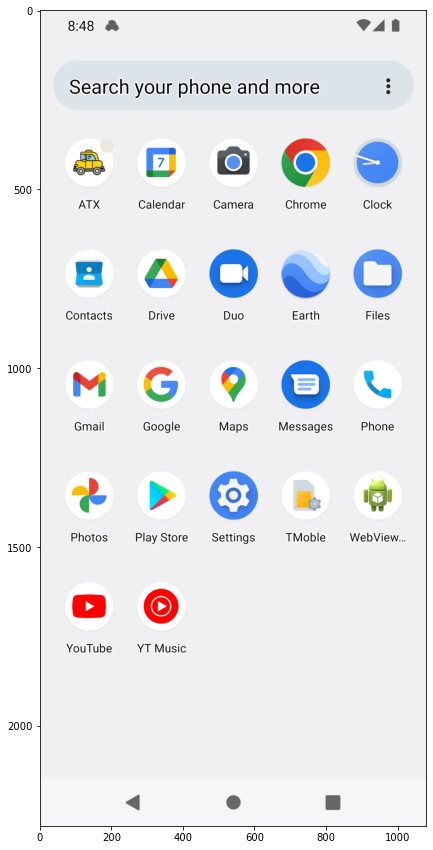

In [23]:
print(uiScreens[0]['uiActionElementIdx'])
print(uiScreens[0]['uiAction'])
display_screen(uiScreens[0]['uiScreenshotPng'])

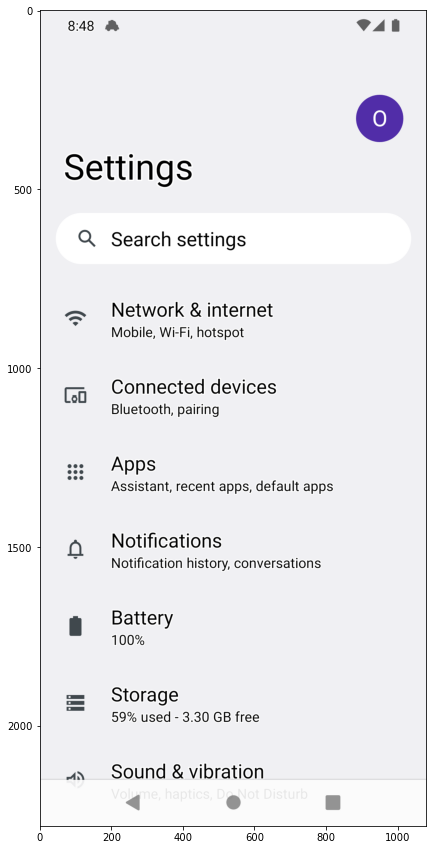

In [21]:
display_screen(uiScreens[1]['uiScreenshotPng'])

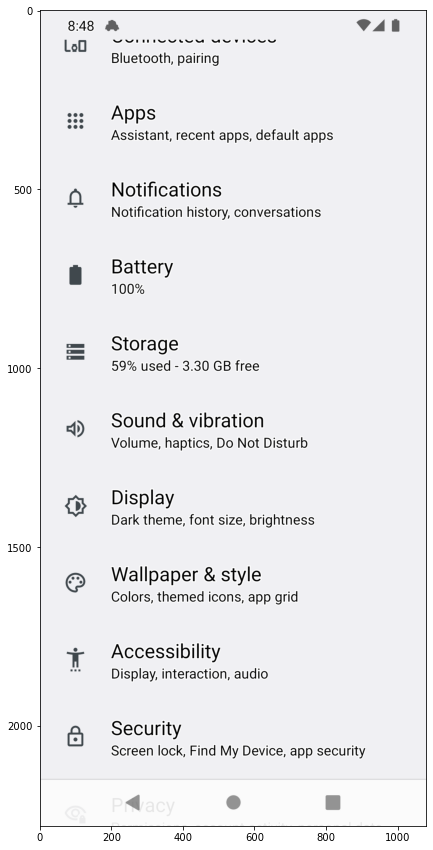

In [22]:
display_screen(uiScreens[2]['uiScreenshotPng'])

In [16]:
!ls ugif-dataset/train | wc -l

158


In [18]:
!ls ugif-dataset/val | wc -l

106


In [17]:
!ls ugif-dataset/test | wc -l

265
